In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm

In [3]:
df = pd.read_csv('data/homes.csv')


In [169]:
#df.columns = df.columns.str.strip().str.replace('"', '')
df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [4]:
df.columns = df.columns.str.replace('"', '')
data=df.copy()
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [5]:
df.columns = df.columns.str.strip()
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    50 non-null     int64  
 1   List    50 non-null     int64  
 2   Living  50 non-null     int64  
 3   Rooms   50 non-null     int64  
 4   Beds    50 non-null     int64  
 5   Baths   50 non-null     int64  
 6   Age     50 non-null     int64  
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


***As per my understanding I interpret this table as information of 50 homes in an area covering following parameters -***

**Sell**: It seem to denote the selling pricing of home (thousands dollars) 
Ranges - $87,000 to $567,000 & mean - $170,360

**List**: It seem to denote the listing price of the home (thousands dollars) 
Ranges - $90,000 to $625,000 & mean - $178,340

**Living**: It seem to denote the living area (not sure) 
Ranges - 10 to 64 & mean - 21.12

**Rooms**: Number of rooms
Ranges - 5 to 12 & mean - 8

**Beds**: Number of bedrooms
Ranges - 3 to 6 & mean - 3

**Baths**: Number of bathrooms
Ranges - 1 to 4 & mean - 2

**Age**: Age of the home
Ranges - 2 to 202 & mean - 30

**Acres**: Size of the lot (in measurement more than that used for living area)
Ranges - 0.22 to 6.49 acres & mean - 1.02 acres

**Taxes**: Property tax (in dollars)
Ranges - $1,445 to $12,192 & mean - $3,706


In [173]:
duplicates = df.duplicated().sum()
print (duplicates)

0


In [174]:
missing_values = df.isnull().sum()
print (missing_values)

Sell      0
List      0
Living    0
Rooms     0
Beds      0
Baths     0
Age       0
Acres     0
Taxes     0
dtype: int64


***Note - No Imputation required as there are no missing values***

In [7]:
df['Age_Categories'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 100, 500], labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51-100", "101-500"])
print(df['Age_Categories'].value_counts())

Age_Categories
11-20      12
0-10        9
21-30       9
31-40       8
41-50       7
51-100      4
101-500     1
Name: count, dtype: int64


In [8]:
#print(df.head(), df.columns)
df['Bargain'] = df['List'] - df['Sell'] 
print(df.head())

   Sell  List  Living  Rooms  Beds  Baths  Age  Acres  Taxes Age_Categories  \
0   142   160      28     10     5      3   60   0.28   3167         51-100   
1   175   180      18      8     4      1   12   0.43   4033          11-20   
2   129   132      13      6     3      1   41   0.33   1471          41-50   
3   138   140      17      7     3      1   22   0.46   3204          21-30   
4   232   240      25      8     4      3    5   2.05   3613           0-10   

   Bargain  
0       18  
1        5  
2        3  
3        2  
4        8  


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing and normalizing the 'Living' column
scaler = StandardScaler()
df['Living_Standardized'] = scaler.fit_transform(df[['Living']])

normalizer = MinMaxScaler()
df['Living_Normalized'] = normalizer.fit_transform(df[['Living']])

In [178]:
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes,Age_Categories,Bargain,Living_Standardized,Living_Normalized
0,142,160,28,10,5,3,60,0.28,3167,51-100,18,0.832210,0.333333
1,175,180,18,8,4,1,12,0.43,4033,11-20,5,-0.377398,0.148148
2,129,132,13,6,3,1,41,0.33,1471,41-50,3,-0.982202,0.055556
3,138,140,17,7,3,1,22,0.46,3204,21-30,2,-0.498359,0.129630
4,232,240,25,8,4,3,5,2.05,3613,0-10,8,0.469328,0.277778


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Sell                 50 non-null     int64   
 1   List                 50 non-null     int64   
 2   Living               50 non-null     int64   
 3   Rooms                50 non-null     int64   
 4   Beds                 50 non-null     int64   
 5   Baths                50 non-null     int64   
 6   Age                  50 non-null     int64   
 7   Acres                50 non-null     float64 
 8   Taxes                50 non-null     int64   
 9   Age_Categories       50 non-null     category
 10  Bargain              50 non-null     int64   
 11  Living_Standardized  50 non-null     float64 
 12  Living_Normalized    50 non-null     float64 
dtypes: category(1), float64(3), int64(9)
memory usage: 5.2 KB


In [11]:
#df['Age_Categories'] = float(df['Age_Categories'])
data.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


Housing data for these 50 homes, is comprising of not null values and hence imputation is not required however to understand the data better, the house age could be groups together, a new analysis could be build on comparing the listing price with the selling price.
Further, to understand the correlation and relationship between different variable we would use EDA techniques and further move to linear regression.

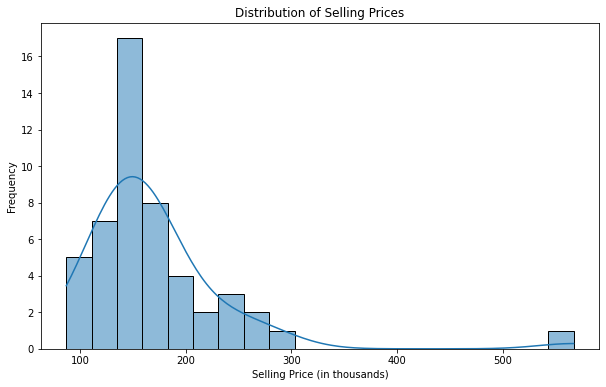

In [181]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Sell'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

In [182]:
outlier_selling = df[df['Sell'] > 350]
print(outlier_selling)

    Sell  List  Living  Rooms  Beds  Baths  Age  Acres  Taxes Age_Categories  \
28   567   625      64     11     4      4    4   0.85  12192           0-10   

    Bargain  Living_Standardized  Living_Normalized  
28       58               5.1868                1.0  


Made a histogram for the distribution of selling prices to see how all the 50 homes values are spread. 
It shows the range of selling prices and we could see this is right-skewed. This means that most of the homes are being sold at low- medium price ranging aroung 100-300 thousand dollars.
The histogram is a good way to see if we have biases in the dataset and whether we need more data points. It also helps in identifying the outlier for example in this case we could see there is 1 house which is sold at way too high of a cost.

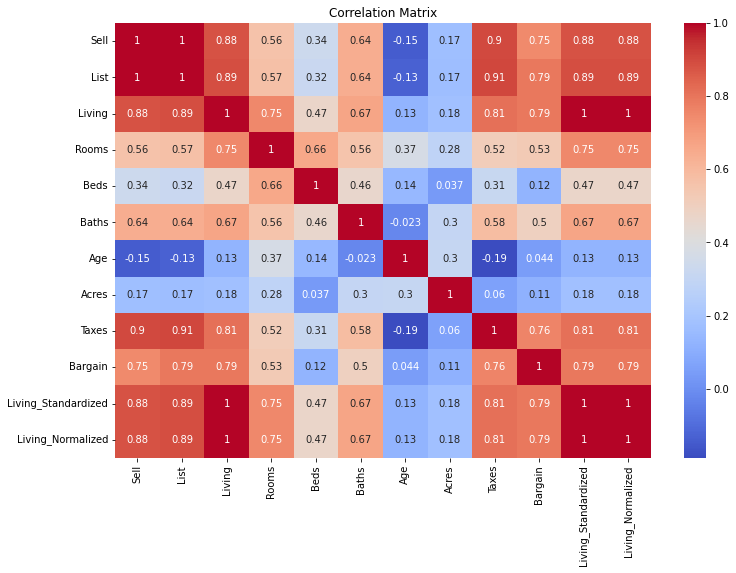

In [183]:
df_copy=df.copy()
df_copy.drop('Age_Categories', axis=1, inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provides understanding of the relationships between different variables in the dataset. 
Here, we can observe how the selling price is related to other features like living area, rooms, and taxes. A high positive correlation indicates that as one variable increases, the other would increase as well, while a high negative correlation indicates the opposite. 
This matrix could be really helpful to identify which variables shoud be considered while building the predicting algorithm.

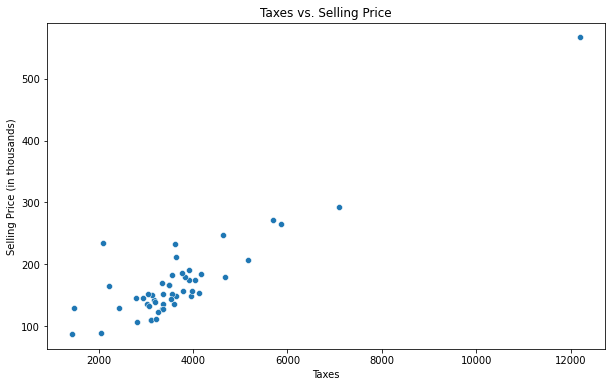

In [184]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Taxes', y='Sell')
plt.title('Taxes vs. Selling Price')
plt.xlabel('Taxes')
plt.ylabel('Selling Price (in thousands)')
plt.show()

The scatter plot shows the relationship between the 2 variables. Here I tried to bring taxes and the selling price of the homes to the graph. Here each point represents a home, with its position determined by its taxes and selling price.

This helps to understand if there is any pattern on how 1 variables (taxes here) might affect the other variable like selling price here.

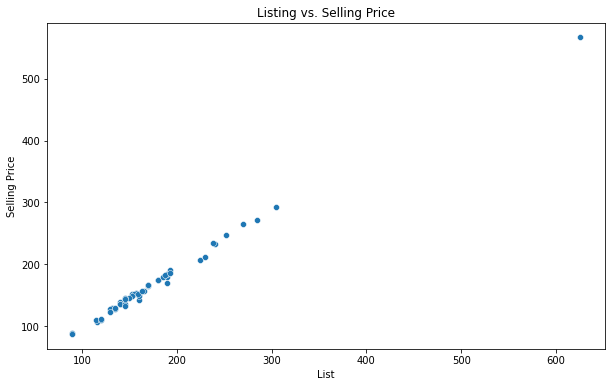

In [190]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='List', y='Sell')
plt.title('Listing vs. Selling Price')
plt.xlabel('List')
plt.ylabel('Selling Price')
plt.show()

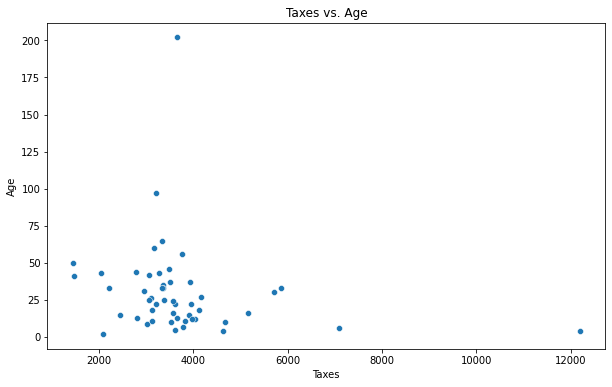

In [192]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Taxes', y='Age')
plt.title('Taxes vs. Age')
plt.xlabel('Taxes')
plt.ylabel('Age')
plt.show()

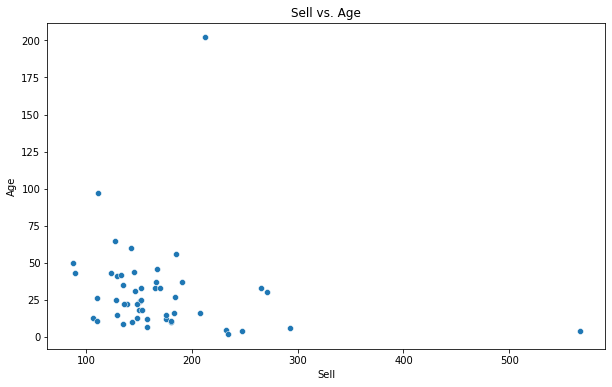

In [193]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sell', y='Age')
plt.title('Sell vs. Age')
plt.xlabel('Sell')
plt.ylabel('Age')
plt.show()

# Linear Regression Model

***1. Used Taxes as the independent variable and Sell as the dependent variable***

In [196]:
import statsmodels.api as sm
X = df[['Taxes']]
X_model = sm.add_constant(X)
y = df['Sell']
model_sm = sm.OLS(y, X_model).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     175.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.90e-16
Time:                        13:16:20   Log-Likelihood:                -196.33
No. Observations:                  40   AIC:                             396.7
Df Residuals:                      38   BIC:                             400.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8543     12.864      1.777      0.0

***2. Used Beds as the independent variable and Sell as the dependent variable***

In [15]:
import statsmodels.api as sm
X_beds = sm.add_constant(df['Beds']) 
X_model = sm.add_constant(X_beds)
y_model = df['Sell'] 
model_sm2 = sm.OLS(y_model, X_model).fit()

print(model_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     6.072
Date:                Wed, 21 Feb 2024   Prob (F-statistic):             0.0174
Time:                        19:11:10   Log-Likelihood:                -281.82
No. Observations:                  50   AIC:                             567.6
Df Residuals:                      48   BIC:                             571.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5261     55.586      0.639      0.5

***3. Used Living as the independent variable and Sell as the dependent variable***

In [17]:
import statsmodels.api as sm
X_beds = sm.add_constant(df['Living']) 
X_model = sm.add_constant(X_beds)
y_model = df['Sell'] 
model_sm3 = sm.OLS(y_model, X_model).fit()

print(model_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           4.39e-17
Time:                        19:11:53   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

***4. Used Rooms as the independent variable and Sell as the dependent variable***

In [18]:
import statsmodels.api as sm
X_beds = sm.add_constant(df['Rooms']) 
X_model = sm.add_constant(X_beds)
y_model = df['Sell'] 
model_sm4 = sm.OLS(y_model, X_model).fit()

print(model_sm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.98
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.31e-05
Time:                        19:12:39   Log-Likelihood:                -275.37
No. Observations:                  50   AIC:                             554.7
Df Residuals:                      48   BIC:                             558.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.5335     55.258     -1.548      0.1

***5. Used Acres as the independent variable and Sell as the dependent variable***

In [19]:
import statsmodels.api as sm
X_beds = sm.add_constant(df['Acres']) 
X_model = sm.add_constant(X_beds)
y_model = df['Sell'] 
model_sm5 = sm.OLS(y_model, X_model).fit()

print(model_sm5.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.406
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.242
Time:                        19:12:51   Log-Likelihood:                -284.08
No. Observations:                  50   AIC:                             572.2
Df Residuals:                      48   BIC:                             576.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.8457     13.550     11.797      0.0

***6. Used Age as the independent variable and Sell as the dependent variable***

In [20]:
import statsmodels.api as sm
X_beds = sm.add_constant(df['Age']) 
X_model = sm.add_constant(X_beds)
y_model = df['Sell'] 
model_sm6 = sm.OLS(y_model, X_model).fit()

print(model_sm6.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.065
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.307
Time:                        19:19:52   Log-Likelihood:                -284.25
No. Observations:                  50   AIC:                             572.5
Df Residuals:                      48   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.8230     14.440     12.523      0.0

On applying linear regression with the dependent variable - Sell, considering different independent variables, I determined that there were 3 independent variables with P value <0.05 and high R square value i.e. Taxes, Rooms, and Living. I looked at these 2 values for performance because a low p value (< 0.05) denotes that there is a significant relationship between selling price and these 3 variables - Taxes, Living, and Rooms. A higher R squar value denotes that more variance in the selling price could be explained by the these 3 mentioned variables

Finally, with these 2 parameters we can say that the 3 mentioned parameters are strong predictors for getting rhe selling price. Out of these 3, Taxes seems to be the strongest one as it has the highest R square value as compared to other variables. This means the model fits the data better and suggests that "Taxes" is a strongest predictor of the selling price.(as P value is same for these 3 parameters) 

Some of the limitations of the model could be as below - 

a) In real world, the selling price of a home cannot be influenced by only 1 factor but it is influenced by a multitude of factors. For example here, we see 3 factors are showing some relation then there are high chances that these 3 togethe could also add more value to predictive model.

b)The model's accuracy is dependent on the quality and amount of the data. Here in this dataset we only have data for 50 homes so we are just evaluating the model basis the impact of factors related to those 50 homes which could be all located in 1 area and might not be accurate for predicting selling price for home at some other location.